In [1]:
# from IPython.display import Image
# Image("../input/carona/carona.jpg")

**Coronavirus disease 2019(COVID-19) is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization.**

### Symtoms of Corona Virus:-
**Generally People are sick from Day 1 to Day 14 before develpoing symptoms.Common symtoms for corona virus is:-** 
* Fever
* Dry Cough
* Tiredness
* In severe condition tends to difficulty in breathing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

In [3]:
pd.set_option('display.max_rows',20000, 'display.max_columns',100)

## INDIA CORONA CASES ANALYSIS

In [4]:
df_carona_in_india = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_carona_india = pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")
df_ICMR = pd.read_csv("../input/covid19-in-india/ICMRTestingDetails.csv")
df_Individual = pd.read_csv("../input/covid19-in-india/IndividualDetails.csv")
df_Hospital = pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")
df_Age = pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")
df_Italy = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_daily_US = pd.read_csv("../input/covid19-in-usa/us_states_covid19_daily.csv")
df_carona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1473,1474,30/04/20,5:00 PM,Telengana,-,-,367,26,1012
1474,1475,30/04/20,5:00 PM,Tripura,-,-,2,0,2
1475,1476,30/04/20,5:00 PM,Uttarakhand,-,-,36,0,55
1476,1477,30/04/20,5:00 PM,Uttar Pradesh,-,-,513,39,2203
1477,1478,30/04/20,5:00 PM,West Bengal,-,-,124,22,758


In [5]:
df_carona_india.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
1458,2020-04-30,Telengana,0,0,367,18.1124,79.0193,26,1012
1459,2020-04-30,Tripura,0,0,2,23.9408,91.9882,0,2
1460,2020-04-30,Uttar Pradesh,0,0,510,26.8467,80.9462,39,2134
1461,2020-04-30,Uttarakhand,0,0,36,30.0668,79.0193,0,55
1462,2020-04-30,West Bengal,0,0,124,22.9868,87.8550,22,758


In [6]:
#Total cases of carona in India
df_carona_in_india['Total Cases'] = df_carona_in_india['Cured'] + df_carona_in_india['Deaths'] + df_carona_in_india['Confirmed']
#Active cases of carona in India
df_carona_in_india['Active Cases'] = df_carona_in_india['Total Cases'] - df_carona_in_india['Cured'] - df_carona_in_india['Deaths']
df_carona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


In [7]:
import matplotlib.pyplot as plt

In [8]:
#Till 8th April Cases in India
df1= df_carona_in_india[df_carona_in_india['Date']=='13/04/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(
    title='Till 8th April Total Cases in India')
fig.show()

In [9]:
#Till 8th April Active Cases in India
df1= df_carona_in_india[df_carona_in_india['Date']=='08/04/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Active Cases', color='Active Cases',barmode='group', height=600)
fig.update_layout(
    title='Till 8th April Active Cases in India')
fig.show()

In [10]:
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
df_carona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,3


In [11]:
#Daily Cases in India Datewise
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
carona_data.head(10)

,Date,Total Cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
5,2020-02-04,3
6,2020-02-05,3
7,2020-02-06,3
8,2020-02-07,3
9,2020-02-08,3


In [12]:
carona_data.shape

(92, 2)

In [13]:
carona_data['Daily Cases'] = carona_data['Total Cases'].sub(carona_data['Total Cases'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['Total Cases'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)
fig = px.bar(carona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

In [14]:
carona_data['Corona Growth Rate'] = carona_data['Total Cases'].pct_change().mul(100).round(2)

In [15]:
#Corona Growth Rate Comparison with Previous Day
fig = px.bar(carona_data, y='Corona Growth Rate', x='Date',hover_data =['Corona Growth Rate','Total Cases'], height=500)
fig.update_layout(
    title='Corona Growth Rate(in Percentage) Comparison with Previous Day')
fig.show()
print("hey")

hey


In [16]:
#Total Cases in India State Datewise
carona_data = df_carona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(carona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=700)
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

In [17]:
df_carona_india.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [18]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_Age, values='TotalCases', names='AgeGroup')
fig.update_layout(
    title='Age Group affected with COVID-19')
fig.show()

In [19]:
# #Agewise Gender affected by COVID-19(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='gender')
# fig.update_layout(
#     title='Agewise Gender affected by COVID-19')
# fig.show()

In [20]:
# #Agewise Covid-19 patients in State(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='detected_state')
# fig.update_layout(
#     title='Agewise Covid-19 patients in State')
# fig.show()

In [21]:
#Genderwise current status of COVID-19(There are lot of Nan Values)
fig = px.histogram(df_Individual.dropna(), x="gender",color ='current_status')
fig.update_layout(
    title='Genderwise current status of COVID-19')
fig.show()

In [22]:
# #Total Cases Datewise of Foreign Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases ( Foreign National )'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases ( Foreign National )',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases ( Foreign National )', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases ( Foreign National )', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Foreign Nationals')
# fig.show()

In [23]:
# #Total Cases Datewise of Indian Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases (Indian National)'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases (Indian National)',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases (Indian National)', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases (Indian National)', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Indian  Nationals')
# fig.show()

In [24]:
df_population_of_india = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")
df_population_of_india.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [25]:
#Statewise Total Cases
df_new = df1.groupby(['State/UnionTerritory','Cured','Deaths','Active Cases'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
df_new.head()

,State/UnionTerritory,Cured,Deaths,Active Cases,Total Cases
18,Maharashtra,79,64,1018,1161
25,Tamil Nadu,19,7,690,716
7,Delhi,21,9,576,606
26,Telengana,35,7,427,469
15,Kerala,70,2,336,408


In [26]:
#Using Merge two join two diffrent data frames and then sorting them in ascending
df_population_with_carona_case = df_population_of_india.merge(df_new, left_on='State / Union Territory', right_on='State/UnionTerritory')
df_population_with_carona_case=df_population_with_carona_case.drop(labels=['State/UnionTerritory','Sno'],axis=1)
df_population_with_carona_case=df_population_with_carona_case.sort_values('Total Cases',ascending=False)
df_population_with_carona_case.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,79,64,1018,1161
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,19,7,690,716
25,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,21,9,576,606
11,Telengana,35003674,21395009,13608665,"112,077 km2 (43,273 sq mi)",312/km2 (810/sq mi),988,35,7,427,469
12,Kerala,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,70,2,336,408


In [27]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_population_with_carona_case, values='Total Cases', names='State / Union Territory')
fig.update_layout(
    title='Pie chart visualization of states effected by caronavirus')
fig.show()

In [28]:
#Latitude and Longitude of Indian State
df_with_utm = pd.read_csv("../input/utm-of-india/UTM ZONES of INDIA.csv")
df_with_utm.head()

,State / Union Territory,Latitude,Longitude
0,Uttar Pradesh,26.8467,80.9462
1,Maharashtra,19.7515,75.7139
2,Bihar,25.0961,85.3131
3,West Bengal,22.9868,87.8550
4,Madhya Pradesh,22.9734,78.6569


In [29]:
#Data of Population,Cases of Carona and UTM 
df_pop_caro_utm = df_population_with_carona_case.merge(df_with_utm , left_on='State / Union Territory', right_on='State / Union Territory')
df_pop_caro_utm.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases,Latitude,Longitude
0,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,79,64,1018,1161,19.7515,75.7139
1,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,19,7,690,716,11.1271,78.6569
2,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,21,9,576,606,28.7041,77.1025
3,Telengana,35003674,21395009,13608665,"112,077 km2 (43,273 sq mi)",312/km2 (810/sq mi),988,35,7,427,469,18.1124,79.0193
4,Kerala,33406061,17471135,15934926,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)",1084,70,2,336,408,10.8505,76.2711


In [30]:
#Total Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Total Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Total Case in Indian States',
    xaxis_title="States",
    yaxis_title="Total Cases",
)
fig.show()

In [31]:
#Active Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Active Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Active Case in Indian States',
    xaxis_title="States",
    yaxis_title="Active Cases",
)
fig.show()

In [32]:
#Total Cases,Active Cases,Cured,Deaths from Corona Virus in India
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Total Cases'],
                    mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Active Cases'], 
                mode='lines+markers',name='Active Cases'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Cured'], 
                mode='lines+markers',name='Cured'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Deaths'], 
                mode='lines+markers',name='Deaths'))
fig.update_layout(title_text='Curve Showing Different Cases from COVID-19 in India',plot_bgcolor='rgb(225,230,255)')
fig.show()

##  INDIAN COUNCIL OF MEDICAL RESEARCH(ICMR) REPORT TILL 25 MARCH

The Indian Council of Research(ICMR) it is the biomedical research apex body in India, itis one of the oldest and largest medical bodies in the world it directly comes under **Ministry of Health and Family welfare Goverment Of India**.
According to ICMR Director-General, it has capacity to conduct 10,000 test per day and it gangs upto total 70,000 test per week.Subsequently ICMR is trying to increase the test per day to get the efficient results for testing **COVID-19**. They have added Goverment Labs and aswell as private labs to test get more test done through out India.

In [33]:
#Testing till 25 March
df_ICMR ['DateTime'] =pd.to_datetime(df_ICMR .DateTime,dayfirst=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))
fig.update_layout(title_text='ICMR TEST for COVID-19',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [34]:
# #Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality
# df_Individual = df_Individual.fillna({
#     'nationality': 'Unknown','current_status': 'Unknown'})
# df_Individual_new= df_Individual.drop(labels=['id','government_id','diagnosed_date','age','gender','detected_city','detected_district','status_change_date','notes'],axis=1)
# df_Individual_new = df_Individual.groupby(['current_status','nationality','detected_state'])['id'].count().reset_index(name='count')
# fig = px.bar(df_Individual_new, x='count', y='detected_state', orientation='h',hover_data =['current_status','nationality','detected_state'], color='current_status',height=700)
# fig.update_layout(
#     title='Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality')
# fig.show()

## CORONA CASES in INDIA vs ITALY

In [35]:
#Total Confirmed Cases INDIA vs ITALY
df_Italy_p = pd.read_csv("../input/covid19-in-italy/covid19_italy_province.csv")
carona_data_ITALY = df_Italy_p.groupby(['Date'])['TotalPositiveCases'].sum().reset_index().sort_values('TotalPositiveCases',ascending = True)

carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['TotalPositiveCases'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Confirmed'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='Total Confirmed Cases INDIA vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [36]:
#COVID-19 Recovered Cases in INDIA Vs ITALY
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
carona_data_ITALY = df_Italy_r.groupby(['Date'])['Recovered'].sum().reset_index().sort_values('Date',ascending = True)
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['Recovered'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [37]:
#COVID-19 Death Cases in ITALY VS INDIA
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
carona_data_ITALY = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['Deaths'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Death Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [38]:
#Daily Deaths in Italy
carona_data = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
carona_data['Daily Deaths'] = carona_data['Deaths'].sub(carona_data['Deaths'].shift())
carona_data['Daily Deaths'].iloc[0] = carona_data['Deaths'].iloc[0]
carona_data['Daily Deaths'] = carona_data['Daily Deaths'].astype(int)
fig = px.bar(carona_data, y='Daily Deaths', x='Date',hover_data =['Daily Deaths'], color='Daily Deaths', height=500)
fig.update_layout(
    title='DAILY DEATHS IN ITALY')
fig.show()

## CORONA CASES in INDIA vs USA

In [39]:
#Total Corona Cases INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['positive'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['positive'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Total Cases'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='Total Corona Cases INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [40]:
#COVID-19 Recovered Cases in INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['recovered'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['recovered'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [41]:
#COVID-19 Death Cases in INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['death'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Death Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [42]:
#DAILY DEATHS IN USA
carona_data = df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('death',ascending = True)
carona_data['Daily Cases'] = carona_data['death'].sub(carona_data['death'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['death'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)
fig = px.bar(carona_data, y='Daily Cases', x='dateChecked',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='DAILY DEATHS IN USA')
fig.show()

## **Kindly VOTE if you LIKED IT and COMMENT for any ADVICE**

# Time Series

In [43]:
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
carona_data['Daily Cases'] = carona_data['Total Cases'].sub(carona_data['Total Cases'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['Total Cases'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)

x= carona_data['Date']
x.head()

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
4   2020-02-03
Name: Date, dtype: datetime64[ns]

In [44]:
x= pd.DataFrame(x)
x['Daily Cases']=carona_data['Daily Cases']
x.tail()

,Date,Daily Cases
87,2020-04-26,2463
88,2020-04-27,2063
89,2020-04-28,2390
90,2020-04-29,2716
91,2020-04-30,2264


In [48]:
from datetime import date, timedelta

sdate = date(2020, 1, 30)   # start date
edate = date(2020, 4, 30) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

In [49]:
x.set_index(dd, inplace=True)
print(x.index)

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [50]:
ts = x['Daily Cases']
ts.tail(10)

2020-04-21    1791
2020-04-22    2235
2020-04-23    1628
2020-04-24    2278
2020-04-25    1893
2020-04-26    2463
2020-04-27    2063
2020-04-28    2390
2020-04-29    2716
2020-04-30    2264
Name: Daily Cases, dtype: int64

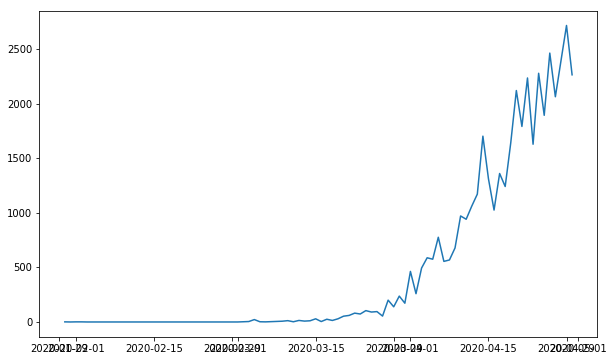

In [51]:
plt.figure(figsize=(10,6))
plt.plot(ts)

In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

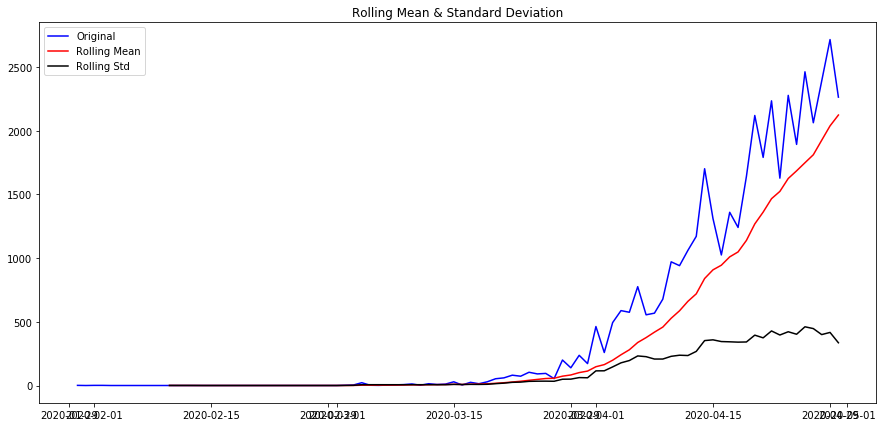

Results of Dickey-Fuller Test:
Test Statistic                 -1.582588
p-value                         0.492334
#Lags Used                     12.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [53]:
test_stationarity(ts)

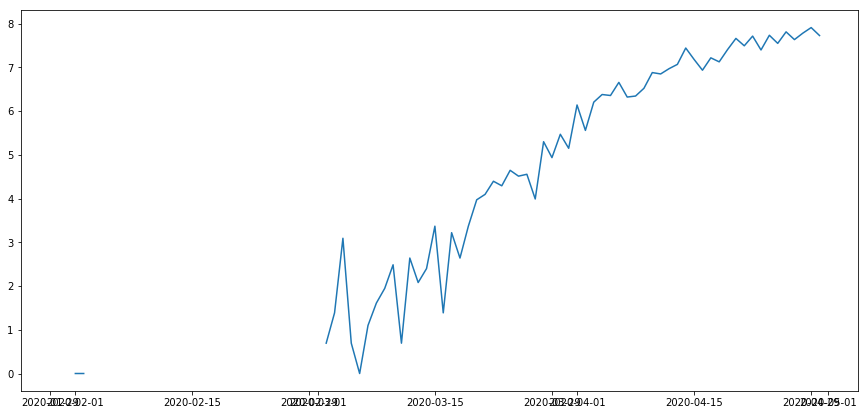

In [54]:
ts_log=np.log(ts)
plt.figure(figsize=(15,7))
plt.plot(ts_log)

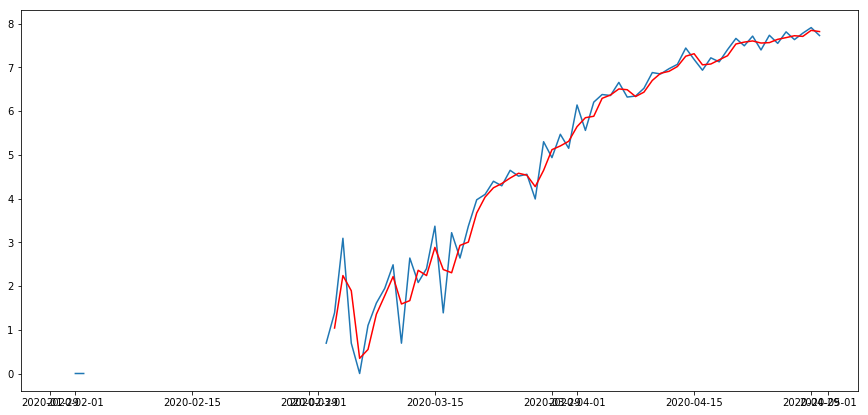

In [55]:
moving_avg = pd.Series(ts_log).rolling(window=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [56]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

2020-01-30    NaN
2020-01-31    NaN
2020-02-01    NaN
2020-02-02    0.0
2020-02-03    NaN
2020-02-04    NaN
2020-02-05    NaN
2020-02-06    NaN
2020-02-07    NaN
2020-02-08    NaN
Name: Daily Cases, dtype: float64

In [57]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

2020-02-02    0.000000
2020-03-03    0.346574
2020-03-04    0.852374
2020-03-05   -1.198948
2020-03-06   -0.346574
Name: Daily Cases, dtype: float64

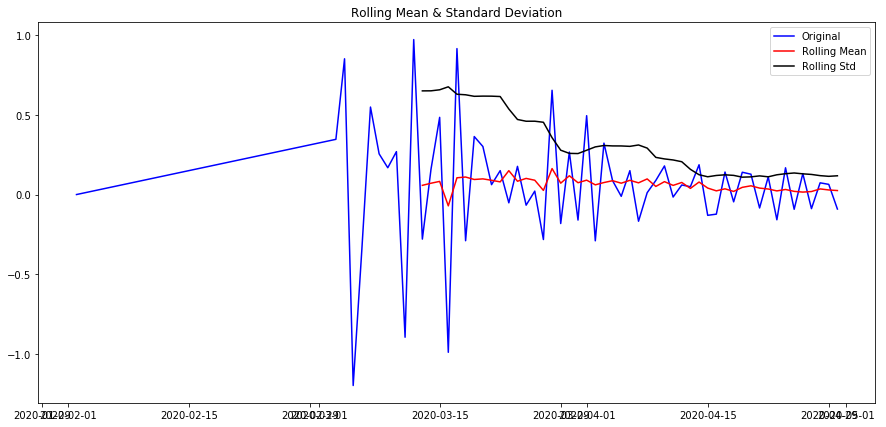

Results of Dickey-Fuller Test:
Test Statistic                 -1.244786
p-value                         0.654039
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [58]:
test_stationarity(ts_log_moving_avg_diff)

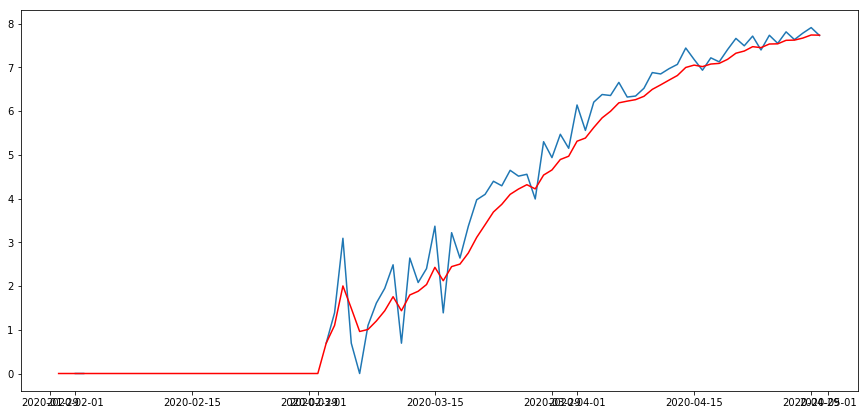

In [59]:
expwighted_avg = ts_log.ewm(halflife=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

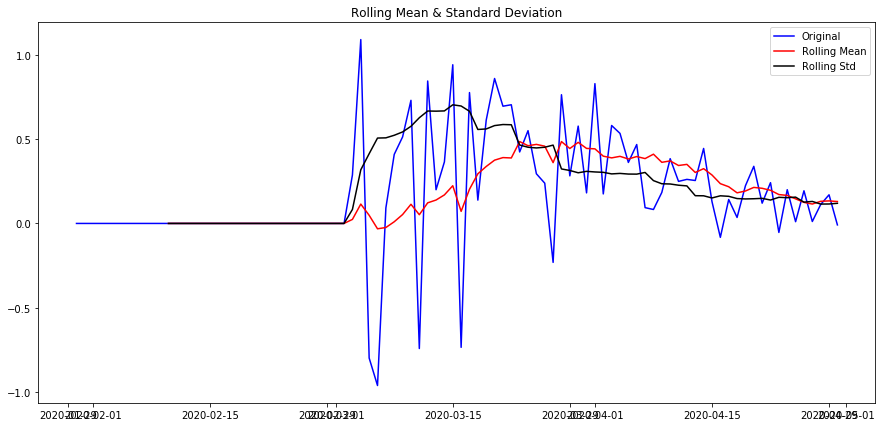

Results of Dickey-Fuller Test:
Test Statistic                 -2.323545
p-value                         0.164487
#Lags Used                      4.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [60]:
from numpy import inf

ts_log[ts_log == -inf] = 0

ts_log_ewma_diff = ts_log - expwighted_avg



test_stationarity(ts_log_ewma_diff)

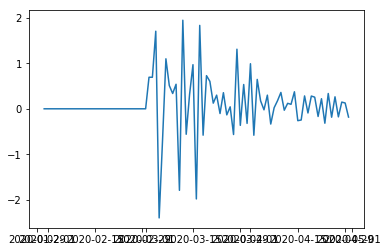

In [61]:
ts_log_diff = ts_log - ts_log.shift()

plt.plot(ts_log_diff)

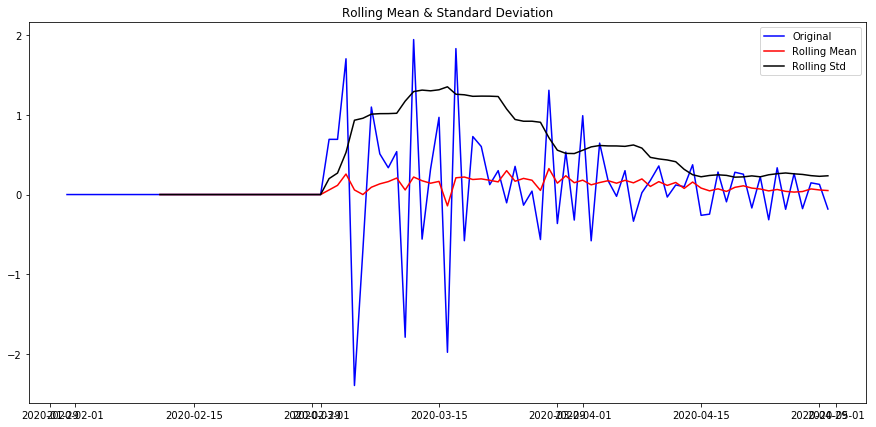

Results of Dickey-Fuller Test:
Test Statistic                -8.494238e+00
p-value                        1.288753e-13
#Lags Used                     3.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [62]:
ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)

In [63]:
ts_log = pd.Series(ts_log)

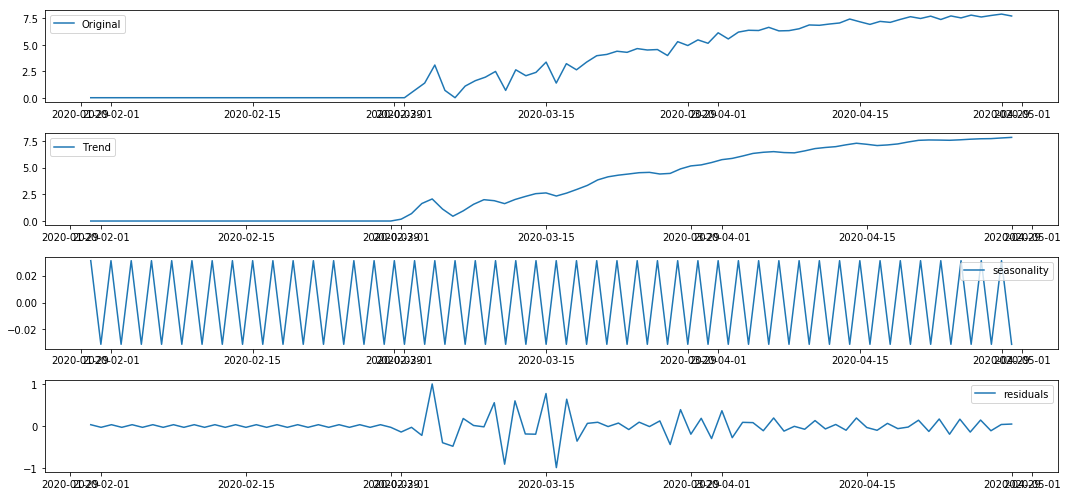

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

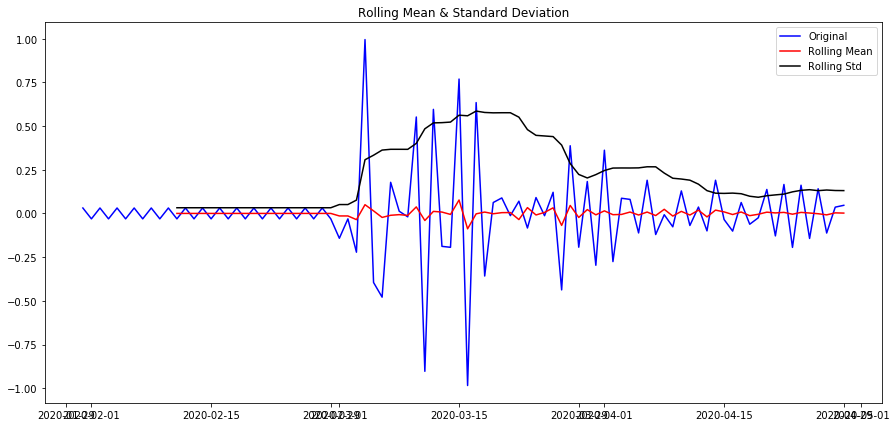

Results of Dickey-Fuller Test:
Test Statistic                 -5.561557
p-value                         0.000002
#Lags Used                     11.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


In [65]:
ts_log_decompose = residual #trend#residual needs to be used for modelling
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

In [66]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20,method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

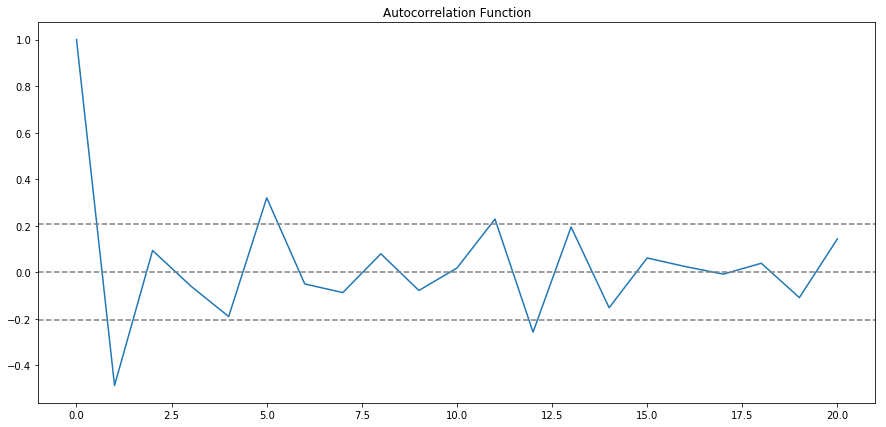

In [67]:
#plot ACF

plt.figure(figsize=(15,7))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')



Text(0.5, 1.0, 'Partial Autocorrelation Function')

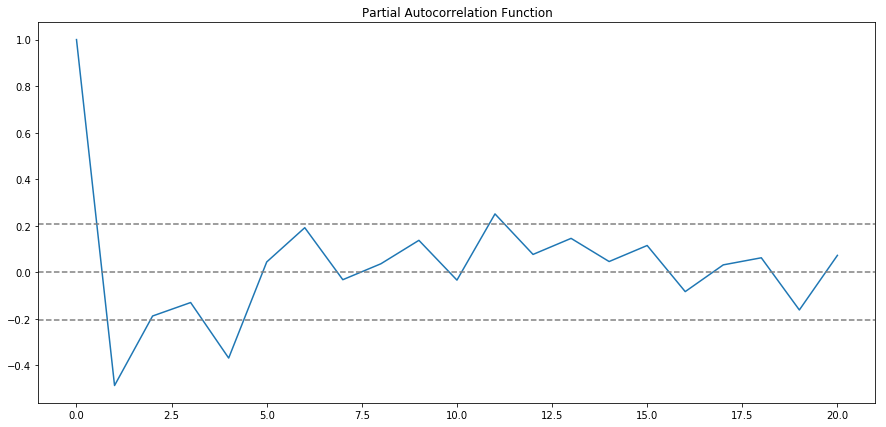

In [68]:
plt.figure(figsize=(15,7))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')

Optimization terminated successfully.
         Current function value: 0.597277
         Iterations: 21
         Function evaluations: 40
         Gradient evaluations: 40


Text(0.5, 1.0, 'RSS: nan')

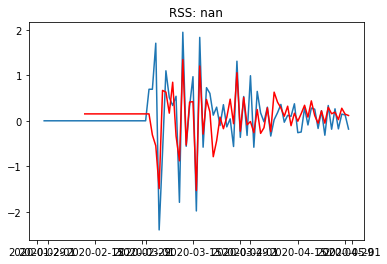

In [69]:
model = ARIMA(ts_log,order=(12,1,0))
results_AR = model.fit(method='css',solver='cg')
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Optimization terminated successfully.
         Current function value: 0.602157
         Iterations: 96
         Function evaluations: 100
         Gradient evaluations: 100


Text(0.5, 1.0, 'RSS: 17.7662')

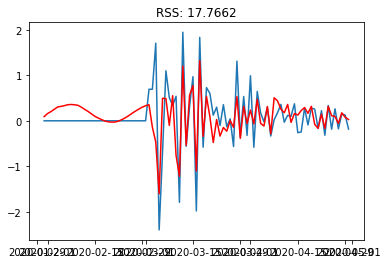

In [70]:
model = ARIMA(ts_log,order=(0,1,12))
results_MA = model.fit(method='css',solver='bfgs')
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 18.1885')

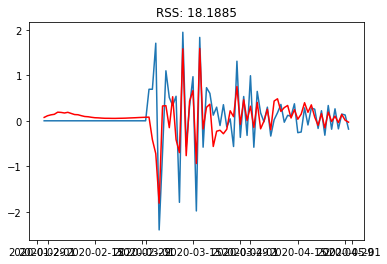

In [71]:
model = ARIMA(ts_log,order=(5,1,5))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [72]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy=True)
# print(predictions_ARIMA_diff)

In [73]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
# print(predictions_ARIMA_diff_cum_sum.head())

In [74]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
# predictions_ARIMA_log.head()

Text(0.5, 1.0, 'RMSE: 524.2693')

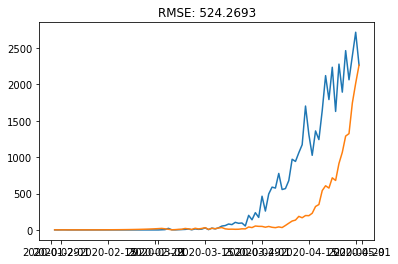

In [75]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [76]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Daily Cases   No. Observations:                   91
Model:                ARIMA(12, 1, 0)   Log Likelihood                 -54.352
Method:                           css   S.D. of innovations              0.481
Date:                Thu, 30 Apr 2020   AIC                            136.704
Time:                        19:43:03   BIC                            169.877
Sample:                    02-12-2020   HQIC                           149.994
                         - 04-30-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1009      0.036      2.794      0.005       0.030       0.172
ar.L1.D.Daily Cases     -0.6674      0.112     -5.939      0.000      -0.888      -0.447
ar.L2.D.Daily Cases     -0.3424      0.131     -2.620      0.009      -0.599      -0.086
ar.L3.D.Daily Cases     -0.3837      0.135     -2.846      0.004      -0.648      -0.119
ar.L4.D.Daily Cases     -0.3385      0.139     -2.428      0.015      -0.612      -0.065
ar.L5.D.Daily Cases      0.1216      0.142      0.857      0.392      -0.157       0.400
ar.L6.D.Daily Cases      0.1219      0.142      0.858      0.391      -0.157       0.400
ar.L7.D.Daily Cases      0.0627      0.141      0.444      0.657      -0.214       0.340
ar.L8.D.Daily Cases      0.2017      0.140      1.437      0.151      -0.073       0.477
ar.L9.D.Daily Cases      0.2043      0.138      1.485      0.138      -0.065       0.474
ar.L10.D.Daily Cases     0.1445      0.134      1.082      0.279      -0.117       0.406
ar.L11.D.Daily Cases     0.2966      0.129      2.291      0.022       0.043       0.550
ar.L12.D.Daily Cases     0.0761      0.112      0.678      0.498      -0.144       0.296
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1118           -0.0000j            1.1118           -0.0000
AR.2             0.8556           -0.7715j            1.1521           -0.1168
AR.3             0.8556           +0.7715j            1.1521            0.1168
AR.4             0.3836           -1.0193j            1.0891           -0.1927
AR.5             0.3836           +1.0193j            1.0891            0.1927
AR.6            -0.1449           -1.1992j            1.2080           -0.2691
AR.7            -0.1449           +1.1992j            1.2080            0.2691
AR.8            -0.7621           -0.7531j            1.0714           -0.3759
AR.9            -0.7621           +0.7531j            1.0714            0.3759
AR.10           -1.0781           -0.3346j            1.1288           -0.4521
AR.11           -1.0781           +0.3346j            1.1288            0.4521
AR.12           -3.5170           -0.0000j            3.5170           -0.5000
------------------------------------------------------------------------------
"""

# Future Predictions

In [77]:
sdate = date(2020, 4, 30)   # start date
edate = date(2020, 5, 30) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

dd =  pd.DataFrame(dd)

# via arima

In [ ]:
X = dd.values

forecast = results_AR.predict(start=sdate,
                                end=edate,)

# via Prophet

In [ ]:
from fbprophet import Prophet
confirmed = x
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95,daily_seasonality=True,
           seasonality_mode= 'multiplicative')
m.fit(confirmed)
future = m.make_future_dataframe(periods=28)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
forecast_components = m.plot_components(forecast)